In [2]:
from google.colab import drive
drive.mount('/content/drive')
with open ("/content/drive/My Drive/traffic/train.p",mode="rb") as training_data:
  train = pickle.load(training_data)
with open ("/content/drive/My Drive/traffic/valid.p",mode="rb") as validation_data:
  valid = pickle.load(validation_data)
with open ("/content/drive/My Drive/traffic/test.p",mode="rb") as testing_data:
  test = pickle.load(testing_data)

Mounted at /content/drive


FileNotFoundError: ignored

In [ ]:
x_train , y_train = train['features'] , train['labels']
x_valid , y_valid = valid['features'] , valid['labels']
x_test , y_test = test['features'] , test['labels']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
from sklearn.utils import shuffle
from tensorflow.keras import datasets,layers,models
from tensorflow import keras as hehe

In [ ]:
x_train.shape

(34799, 32, 32, 3)

In [ ]:
from sklearn.utils import shuffle
x_train , y_train = shuffle(x_train,y_train)
x_valid , y_valid = shuffle(x_valid,y_valid)
x_test , y_test = shuffle(x_test,y_test)

In [ ]:
x_train_gray = np.sum(x_train/3 , axis=3 , keepdims = True)
x_valid_gray = np.sum(x_valid/3 , axis = 3 , keepdims = True)
x_test_gray = np.sum(x_test/3 , axis = 3 , keepdims =True)

In [ ]:
x_train_gray_norm  = (x_train_gray - 128)/128
x_valid_gray_norm  = (x_valid_gray - 128)/128
x_test_gray_norm  = (x_test_gray - 128)/128

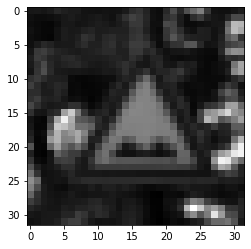

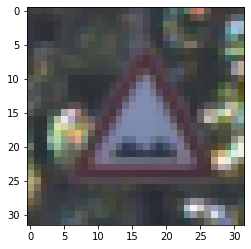

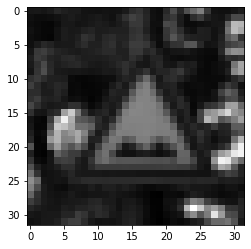

In [ ]:
i = np.random.randint(1 , len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze() , cmap = 'gray')

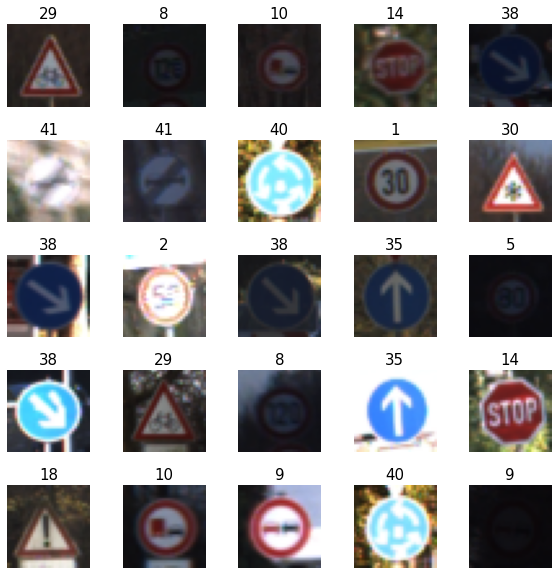

In [ ]:
w=5
l=5
fig,axes = plt.subplots(l,w,figsize=(10,10))
axes = axes.ravel()
n_training = len(x_train)
for i in np.arange(0 ,l*w):
  index = np.random.randint(0,n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index],fontsize = 15)
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [ ]:
from tensorflow.keras import datasets,layers,models
cnn = models.Sequential()
cnn.add(layers.Conv2D(16,(5,5),activation ='relu',input_shape=(32,32,1)))
cnn.add(layers.AveragePooling2D())
cnn.add(layers.Flatten())
cnn.add(layers.Dense(120 , activation = 'relu'))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(98,activation = 'relu'))
cnn.add(layers.Dense(84 , activation  = 'relu'))
cnn.add(layers.Dense(43 , activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               376440    
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 98)                11858     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                8

In [ ]:
from tensorflow import keras as hehe
opt = hehe.optimizers.Adadelta(learning_rate=0.01)
cnn.compile(optimizer = opt , loss = 'sparse_categorical_crossentropy' ,metrics = ['accuracy'])
history = cnn.fit(x_train_gray_norm,y_train,batch_size = 50 ,epochs=20,verbose=1,validation_data=(x_valid_gray_norm,y_valid))

Epoch 1/20
696/696 [==============================] - 6s 9ms/step - loss: 3.6166 - accuracy: 0.0710 - val_loss: 3.5824 - val_accuracy: 0.0744
Epoch 2/20
696/696 [==============================] - 6s 9ms/step - loss: 3.5041 - accuracy: 0.0843 - val_loss: 3.5114 - val_accuracy: 0.0794
Epoch 3/20
696/696 [==============================] - 6s 9ms/step - loss: 3.4179 - accuracy: 0.0979 - val_loss: 3.4528 - val_accuracy: 0.1059
Epoch 4/20
696/696 [==============================] - 6s 9ms/step - loss: 3.3493 - accuracy: 0.1153 - val_loss: 3.4021 - val_accuracy: 0.1172
Epoch 5/20
696/696 [==============================] - 6s 9ms/step - loss: 3.2829 - accuracy: 0.1292 - val_loss: 3.3440 - val_accuracy: 0.1245
Epoch 6/20
696/696 [==============================] - 6s 9ms/step - loss: 3.2122 - accuracy: 0.1496 - val_loss: 3.2750 - val_accuracy: 0.1381
Epoch 7/20
696/696 [==============================] - 7s 10ms/step - loss: 3.1367 - accuracy: 0.1691 - val_loss: 3.1978 - val_accuracy: 0.1608
Epoch

In [ ]:
history.history.keys()
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training accuracy vs valid accuracy')

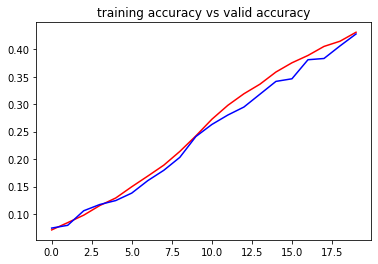

In [ ]:
epochs =range(len(accuracy))
plt.plot(epochs,accuracy,'r',label = 'Train accuracy')
plt.plot(epochs ,val_accuracy , 'b',label ='valid accuracy')
plt.title('training accuracy vs valid accuracy')

Text(0.5, 1.0, 'training loss vs validation loss')

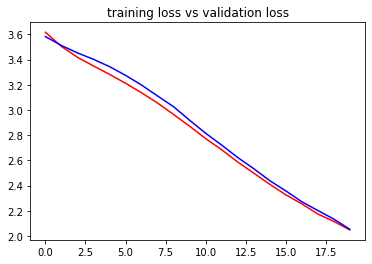

In [ ]:
epochs =range(len(accuracy))
plt.plot(epochs,loss,'r',label = 'Training loss')
plt.plot(epochs ,val_loss , 'b',label ='validation loss')
plt.title('training loss vs validation loss')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


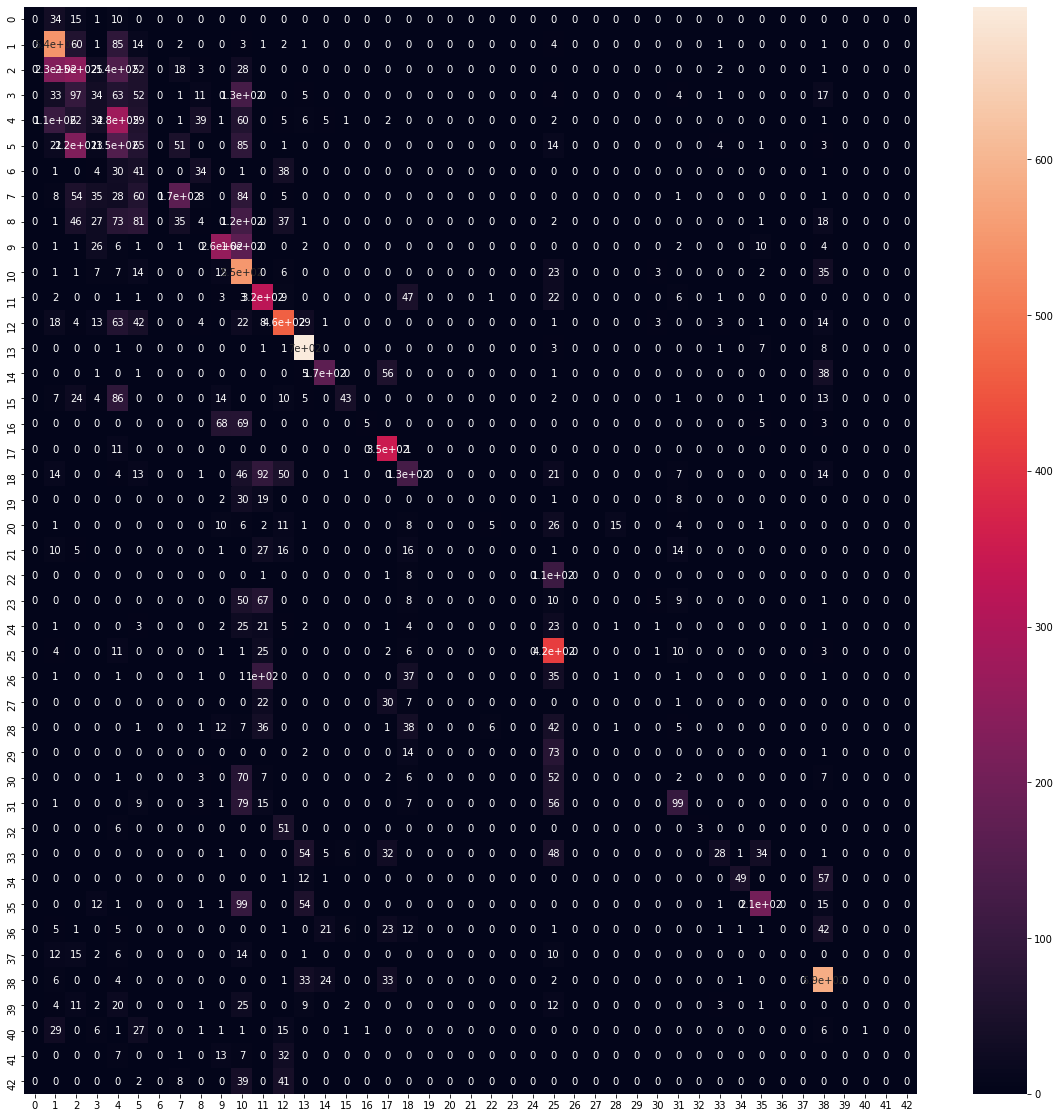

In [ ]:
predicted_classes = cnn.predict_classes(x_test_gray_norm)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true , predicted_classes)
plt.figure(figsize = (20,20))
sns.heatmap(cm,annot=True)

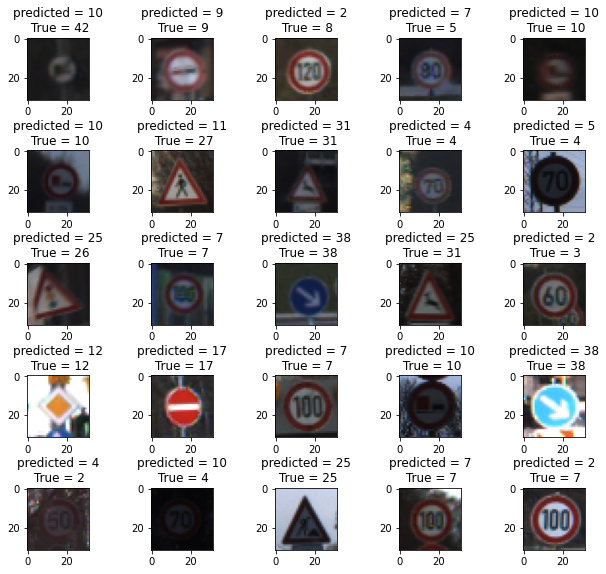

In [ ]:
i=5
j=5
fig,axes2 = plt.subplots(i,j,figsize=(10,10))
axes2 = axes2.ravel()
for i in np.arange(0 , i*j):
  axes2[i].imshow(x_test[i])
  axes2[i].set_title('predicted = {}\n True = {}'.format(predicted_classes[i],y_true[i]))
plt.subplots_adjust(wspace = 1)

In [1]:
import pickle
from pickle import load
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(cnn) 
  
# Load the pickled model 
knn_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
knn_from_pickle.predict(x_test) 

NameError: ignored